# <span style="color:#2B547E">  Cyclistic Bike-Share Analysis </span>


<center><img src="https://images.squarespace-cdn.com/content/v1/5a276173d74cff1ed05707da/1623529658627-0GFPN47HG0KZHIA92580/Cyclistic+Bike-Share.png?format=500w" width="400"></center>

 


# <span style="color:#2B547E"> 1.Introduction </span> <a class="anchor" id="summary_1"></a>

## How Does a Bike-Share Navigate Speedy Success?
This capstone project is the final deliverable of the Google Data Analytics Professional Certificate. This case study is based on a fictional bike-share company called Cyclistic.

### About the Company

* Cyclistic is a bike-share program that features **5,824 bicycles and 692 docking stations**.
* Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.
* It has **3 flexible pricing plans**- single-ride passes, full-day passes, and annual memberships.
* Single-ride or full-day pass customers are **casual riders** while those who purchase annual memberships are Cyclistic members.

### Scenario

* The director of marketing believes the company’s future success depends on **maximizing the number of annual memberships**, as they are much more profitable than casual riders. 

* Instead of targeting all-new customers, focus of the marketing strategy is on **converting casual riders to annual members**.

The case study will follow the 6 steps of Data analysis process : **Ask, Prepare, Process, Analyse, Share, Act** as described in the Google Data Analytics Professional Certificate.

# <span style="color:#2B547E"> 2. ASK phase </span> <a class="anchor" id="ask_phase_2"></a>

### 2.1 Buisness Task <a class = "anchor" id = "business_Task_2_1" ></a>

As a data analyst working on the marketing analyst team, I will analyze the difference in usage patterns of casual riders and annual members with the aim to convert casual riders into annual members. By outlining the process of the analysis and the key findings, high-level recommendations for marketing strategies will be presented to the key stakeholders. 


### 2.2 Questions for the analysis <a class="anchor" id="questions_for_the_ analysis_2_2"></a> 

Goal of the Marketing Director: **Design marketing strategies aimed at converting casual riders into annual members**

Three questions will guide the future marketing program:

1. How do annual members and casual riders use Cyclistic bikes differently?

2. Why would casual riders buy Cyclistic annual memberships?

3. How can Cyclistic use digital media to influence casual riders to become members?


### Key Stakeholders:

* **Lily Moreno The director of marketing**: responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.

* **Cyclistic executive team** : The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.



# <span style="color:#2B547E"> 3. Prepare Phase </span> <a class="anchor" id="prepare_phase_3"></a> 

##### This step includes identifying and collecting the data from its location and determining its integrity, credibility and accessibility.

#### 3.1 Data location <a class="anchor" id="Data_location_3_1"></a> 

* Since Cyclistic is a fictional company, real-world data of Divvy, a bike-share company in Chicago has been used
* Data source link: [Divvy Public Data](https://divvy-tripdata.s3.amazonaws.com/index.html)
    

####  3.2 Data organization and verification <a class="anchor" id="Data_ organization_and_verification_3_2"></a> 

Data includes previous 12 month historical trip data from April 2021 to March 2022 with one .csv file for each month Each .csv file is organized in rows and columns structure with 13 Columns and variable rows

####   3.3 Licensing and privacy of data <a class="anchor" id="licensing_and_privacy_of_data_3_3"></a> 

Data has been made available by Motivate International Inc. under this [License](https://ride.divvybikes.com/data-license-agreement)
* The data does not contain any private information of the riders, thereby maintaining their privacy.
* The data stands secure in an AWS web portal.
* The data is open-source and accessible to all
    
  
####  3.4 Data Credibility and Integrity:<a class="anchor" id="data_credibility_and_integrity_3_4"></a> 

The data is credible and free of bias. It comes from a reliable source, it is original trip data, comprehensive and current (last 12 months data).



####  3.5 Installing packages and opening libraries <a class="anchor" id="installing_packages_and_opening_libraries_3_5"></a> 

Because of the accessibility, amount of data, and potential to create data visualizations to share my findings with stakeholders, I will perform my analysis in R, 
and We will choose the packages that will help us on our analysis and open them. 


* **here package**: Makes referencing files easier

* **skimr package**: Summarizing data really easy and let us skim through it more quickly.

* **janitor package**: Has functions for cleaning data.

* **lubridat package**: Makes it easier to work with dates and times. 

* **ggpubr package**: Facilitates the creation of beautiful ggplot2-based graphs.

* **ggrepel package** : Provides geoms for ggplot2 to repel overlapping text labels

* **tidyverse package**: A collection of packages for data manipulation, exploration, and visualization
    
* **dplyr package**:  for making data manipulation easier.


In [1]:
library(here)
library(skimr)
library(janitor)
library(lubridate)
library(ggplot2)
library(ggrepel)
library(tidyverse)
library(dplyr)

here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()



###  3.6 Importing datasets <a class="anchor" id="importing_datasets_3_6"></a>

We'll upload the datasets that will help us solve our business task, now that we know what we have. We will focus our analysis on the following datasets:

 - Upload Cyclistic 12 months dataset (.csv files) here

In [2]:

April_2021 <- read.csv("../input/cyclistic-divvy-apr2021-mar2022/202104-divvy-tripdata.csv")
May_2021 <- read.csv("../input/cyclistic-divvy-apr2021-mar2022/202105-divvy-tripdata.csv")
June_2021 <- read.csv("../input/cyclistic-divvy-apr2021-mar2022/202106-divvy-tripdata.csv")
July_2021 <- read.csv("../input/cyclistic-divvy-apr2021-mar2022/202107-divvy-tripdata.csv")
Aug_2021<- read.csv("../input/cyclistic-divvy-apr2021-mar2022/202108-divvy-tripdata.csv")
Sept_2021 <- read.csv("../input/cyclistic-divvy-apr2021-mar2022/202109-divvy-tripdata.csv")
Oct_2021 <- read.csv("../input/cyclistic-divvy-apr2021-mar2022/202110-divvy-tripdata.csv")
Nov_2021 <- read.csv("../input/cyclistic-divvy-apr2021-mar2022/202111-divvy-tripdata.csv")
Dec_2021 <- read.csv("../input/cyclistic-divvy-apr2021-mar2022/202112-divvy-tripdata.csv")
Jan_2022 <- read_csv("../input/cyclistic-divvy-apr2021-mar2022/202201-divvy-tripdata.csv")
Feb_2022 <- read_csv("../input/cyclistic-divvy-apr2021-mar2022/202202-divvy-tripdata.csv")
Mar_2022 <- read_csv("../input/cyclistic-divvy-apr2021-mar2022/202203-divvy-tripdata.csv")


Rows: 103770 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 115609 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 284042 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

# <span style="color:#2B547E">  4. Process Phase </span> <a class="anchor" id="process_phase_4"></a> 
 

###  4.1 Checking for column consistency <a class="anchor" id="Checking_for_column_consistency_4_1"></a> 

Ensuring that the columns match perfectly in all 12 datasets before we can use a command to join them into one file


In [3]:

compare_df_cols_same(April_2021, May_2021, June_2021, July_2021, Aug_2021, Sept_2021, Oct_2021, Nov_2021, Dec_2021, Jan_2022, Feb_2022, Mar_2022)


  column_name       ..1       ..2       ..3       ..4       ..5       ..6
1    ended_at character character character character character character
2  started_at character character character character character character
        ..7       ..8       ..9            ..10            ..11            ..12
1 character character character POSIXct, POSIXt POSIXct, POSIXt POSIXct, POSIXt
2 character character character POSIXct, POSIXt POSIXct, POSIXt POSIXct, POSIXt


[1] FALSE

#### 4.1.1 Locate and fix error

The above error code prevented the join. We will run str() on the data frames to determine where the inconsistency is occurring


In [4]:
str(April_2021)
str(May_2021)
str(June_2021)
str(July_2021)
str(Aug_2021)
str(Sept_2021)
str(Oct_2021)
str(Nov_2021)
str(Dec_2021)
str(Jan_2022)
str(Feb_2022)
str(Mar_2022)

'data.frame':	337230 obs. of  13 variables:
 $ ride_id           : chr  "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ rideable_type     : chr  "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ started_at        : chr  "2021-04-12 18:25:36" "2021-04-27 17:27:11" "2021-04-03 12:42:45" "2021-04-17 09:17:42" ...
 $ ended_at          : chr  "2021-04-12 18:56:55" "2021-04-27 18:31:29" "2021-04-07 11:40:24" "2021-04-17 09:42:48" ...
 $ start_station_name: chr  "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ start_station_id  : chr  "TA1307000061" "KA1503000069" "20121" "TA1305000034" ...
 $ end_station_name  : chr  "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ end_station_id    : chr  "13235" "KA1503000069" "20121" "13235" ...
 $ start_lat         : num  41.9 41.8 41.7 41.9 41.7 ...
 $ start_lng         : num 

The following dataframes were identified as housing the error:

* Jan_2022

* Feb_2022

* Mar_2022



Make necessary data frame correction, in this case change some column data type to character to sync with other datasets

In [5]:
Jan_2022 <- mutate(Jan_2022, started_at = as.character(started_at) ,
                   ended_at = as.character(ended_at))
Feb_2022 <- mutate(Feb_2022, started_at = as.character(started_at) ,
                   ended_at = as.character(ended_at))
Mar_2022 <- mutate(Mar_2022, started_at = as.character(started_at) ,
                   ended_at = as.character(ended_at))

We will check the error if it is fixed

In [6]:
compare_df_cols_same(April_2021, May_2021, June_2021, July_2021, Aug_2021, Sept_2021, Oct_2021, Nov_2021, Dec_2021, Jan_2022, Feb_2022, Mar_2022)

[1] TRUE

#### 4.1.2 Merging Dataframes

The result is "TRUE", we will continue to merge all data into one data frame named "trips_total"

In [7]:
trips_total <- bind_rows(April_2021, May_2021, June_2021, July_2021, Aug_2021, Sept_2021, Oct_2021, Nov_2021, Dec_2021, Jan_2022, Feb_2022, Mar_2022)


#### 4.1.3 Inspecting the new dataset

We will preview our selected data frames and check the summary of each column.

In [8]:
skim_without_charts(trips_total)  #checking the dataframe structure

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,ride_id,0,1.0000000,8,16,0,5723532,0,NA,NA,NA,NA,NA,NA,NA
2,character,rideable_type,0,1.0000000,11,13,0,3,0,NA,NA,NA,NA,NA,NA,NA
3,character,started_at,0,1.0000000,13,19,0,4386207,0,NA,NA,NA,NA,NA,NA,NA
4,character,ended_at,0,1.0000000,13,19,0,4380376,0,NA,NA,NA,NA,NA,NA,NA
5,character,start_station_name,82086,0.9856582,0,53,663290,862,0,NA,NA,NA,NA,NA,NA,NA
6,character,start_station_id,82086,0.9856582,0,44,663287,864,0,NA,NA,NA,NA,NA,NA,NA
7,character,end_station_name,89439,0.9843735,0,53,706808,861,0,NA,NA,NA,NA,NA,NA,NA
8,character,end_station_id,89439,0.9843735,0,44,706808,863,0,NA,NA,NA,NA,NA,NA,NA
9,character,member_casual,0,1.0000000,6,6,0,2,0,NA,NA,NA,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values     
Name                       trips_total
Number of rows             5723532    
Number of columns          13         
_______________________               
Column type frequency:                
  character                9          
  numeric                  4          
________________________              
Group variables            None       

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max  empty n_unique whitespace
1 ride_id                    0         1       8  16      0  5723532          0
2 rideable_type              0         1      11  13      0        3          0
3 started_at                 0         1      13  19      0  4386207          0
4 ended_at                   0         1      13  19      0  4380376          0
5 start_station_name     82086         0.986   0  53 663290      862          0
6 start

In [9]:
head(trips_total) #checking the first few rows of the data


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member
2,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual
3,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
4,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member
5,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
6,097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual


In [10]:
glimpse(trips_total) #return summaries of each column in the data


Rows: 5,723,532
Columns: 13
$ ride_id            <chr> "6C992BD37A98A63F", "1E0145613A209000", "E498E15508…
$ rideable_type      <chr> "classic_bike", "docked_bike", "docked_bike", "clas…
$ started_at         <chr> "2021-04-12 18:25:36", "2021-04-27 17:27:11", "2021…
$ ended_at           <chr> "2021-04-12 18:56:55", "2021-04-27 18:31:29", "2021…
$ start_station_name <chr> "State St & Pearson St", "Dorchester Ave & 49th St"…
$ start_station_id   <chr> "TA1307000061", "KA1503000069", "20121", "TA1305000…
$ end_station_name   <chr> "Southport Ave & Waveland Ave", "Dorchester Ave & 4…
$ end_station_id     <chr> "13235", "KA1503000069", "20121", "13235", "20121",…
$ start_lat          <dbl> 41.89745, 41.80577, 41.74149, 41.90312, 41.74149, 4…
$ start_lng          <dbl> -87.62872, -87.59246, -87.65841, -87.67394, -87.658…
$ end_lat            <dbl> 41.94815, 41.80577, 41.74149, 41.94815, 41.74149, 4…
$ end_lng            <dbl> -87.66394, -87.59246, -87.65841, -87.66394, -87.658…
$ member_cas

In [11]:
nrow(trips_total) #return the number of rows

[1] 5723532

In [12]:
colnames(trips_total) #listing out all the column names 

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

**Key findings**

-   Total **5723532 rows and 13 columns**
-   Total no. of rows = Total no. of unique `ride_id`
-   Each row represents a unique trip, **there are no duplicates**
-   **3 unique types** of `rideable_type` : classic bike, electric bike, docked bike
-   **2 unique types** of user type : casual, member

**Problems with the data**

-   Columns with **missing values**
    -   `start_station_name`
    -   `start_station_id`
    -   `end_station_name`
    -   `end_station_id`
    -   `end_lat`
    -   `end_lng`
-   Some of the column names are non-intuitive and **need to be renamed**
-   There is no column representing the length of ride. Thus, a new calculated column showing **ride length** has to be added
-   The data can only be aggregated at the ride-level, which is too granular. We will want to add some additional columns of data such as **day, week, month, year** that provide additional opportunities to aggregate the data
-   We will want to add a new column showing the **time of day** when the trip started ie. Morning, Afternoon, Evening or Night


###  4.2 Data’s ability to address the Business Task <a class="anchor" id="Data’s_ability_to_address_the_Business_Task"></a> 

The data can tell us about the difference in usage of casual riders and annual members in terms of:

-   the type of bike
-   trip length
-   weekday of trip
-   time of trip
-   trip start station
-   trip end station
-   monthly trends
-   weekly trends
-   percentage share of casual riders and annual members










#### 4.2.1 Add and Rename columns
 

In [13]:
trips_total <- rename(trips_total, "type_of_bike"= "rideable_type", "user_type"="member_casual")


* Create ride length observation as ‘ride_length’ trip duration in seconds format


* Ride length will be a crucial observation for analysis

In [14]:
trips_total$ride_length <- difftime(trips_total$ended_at,trips_total$started_at)
head(trips_total)

,ride_id,type_of_bike,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>
1,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member,1860 secs
2,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual,3840 secs
3,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,341880 secs
4,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member,1500 secs
5,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,5460 secs
6,097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual,0 secs


Separate date time columns into **date, day, day_of_week, month and year**

In [15]:
trips_total$date <- as.Date(trips_total$started_at) #adding trip start date column
trips_total$day <- format(as.Date(trips_total$date), "%d") #adding day column
trips_total$day_of_week <- format(as.Date(trips_total$date),"%a") #adding weekday column
trips_total$month <- format(as.Date(trips_total$date), "%b") #adding month column
trips_total$year <- format(as.Date(trips_total$date), "%Y") #adding year column

#### 4.2.2 Data Transformation

Assign numeric data type to “ride_length” to enable calculations

In [16]:
is.factor(trips_total$ride_length)
trips_total$ride_length <- as.numeric(as.character(trips_total$ride_length))
is.numeric(trips_total$ride_length)
str(trips_total)

[1] FALSE

[1] TRUE

'data.frame':	5723532 obs. of  19 variables:
 $ ride_id           : chr  "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ type_of_bike      : chr  "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ started_at        : chr  "2021-04-12 18:25:36" "2021-04-27 17:27:11" "2021-04-03 12:42:45" "2021-04-17 09:17:42" ...
 $ ended_at          : chr  "2021-04-12 18:56:55" "2021-04-27 18:31:29" "2021-04-07 11:40:24" "2021-04-17 09:42:48" ...
 $ start_station_name: chr  "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ start_station_id  : chr  "TA1307000061" "KA1503000069" "20121" "TA1305000034" ...
 $ end_station_name  : chr  "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ end_station_id    : chr  "13235" "KA1503000069" "20121" "13235" ...
 $ start_lat         : num  41.9 41.8 41.7 41.9 41.7 ...
 $ start_lng         : num

Checking if "ride_length" is converted to numeric

In [17]:
is.numeric(trips_total$ride_length)

[1] TRUE

#### 4.2.3 Inspect the dataframe




In [18]:
skim_without_charts(trips_total) #getting summary statistics
glimpse(trips_total) #Inspecting the column data types

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,Date.min,Date.max,Date.median,Date.n_unique,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<date>,<date>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,ride_id,0,1.0000000,8,16,0,5723532,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,type_of_bike,0,1.0000000,11,13,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,started_at,0,1.0000000,13,19,0,4386207,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,character,ended_at,0,1.0000000,13,19,0,4380376,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,character,start_station_name,82086,0.9856582,0,53,663290,862,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,character,start_station_id,82086,0.9856582,0,44,663287,864,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,character,end_station_name,89439,0.9843735,0,53,706808,861,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,character,end_station_id,89439,0.9843735,0,44,706808,863,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,character,user_type,0,1.0000000,6,6,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values     
Name                       trips_total
Number of rows             5723532    
Number of columns          19         
_______________________               
Column type frequency:                
  character                13         
  Date                     1          
  numeric                  5          
________________________              
Group variables            None       

── Variable type: character ────────────────────────────────────────────────────
   skim_variable      n_missing complete_rate min max  empty n_unique whitespace
 1 ride_id                    0         1       8  16      0  5723532          0
 2 type_of_bike               0         1      11  13      0        3          0
 3 started_at                 0         1      13  19      0  4386207          0
 4 ended_at                   0         1      13  19      0  4380376          0
 5 start_station_name     82086         0.9

##### key findings:

-   The minimum value of `ride_length` is negative, thus making it invalid
-   The maximum value of `ride_length` is 5344707 seconds (1484.6 hrs), which is an outlier



### 4.3 Make sure our data is clean <a class="anchor" id="Make_sure_our_data_is_clean_4_4"></a> 

Now that we  know more about our data structures we will process them to look for any errors and inconsistencies. 

#### 4.3.1 Removing Bad Data

-   **Assumption 1:** Rides with negative `ride_length` are considered invalid since the trip start time cannot be greater than the trip end time
-   The company's website mentions that rides with `ride_length` **less than 60 seconds are invalid** as it was potentially false starts or users trying to re-dock a bike to ensure it was secure. [Link to the website](https://ride.divvybikes.com/system-data)
-   **Assumption 2:** Rides with `ride_length` greater than 24 hrs are outliers and hence, invalid
-   **Assumption 3:** Rides with NA's in `end_lat` or `end_lng` are considered invalid as the rides were not ended in the proper way
-   **Assumption 4:** Rides with NA's in station names but with `end_lat` or `end_lng` are considered valid rides

We will create a new version of the dataframe (v2) since data is being removed.

#### 4.3.2 Filter and clean bad data


Removing negative `ride_length`, `ride_length` less than 60 seconds and `ride_length` greater than 24 hrs

In [19]:
trips_total_v2 <- trips_total %>% 
  filter(!(ride_length<60)) %>% 
  filter(!(ride_length>86400))

After removing the negative values from ride_lenght, we will check now the minimum and maximum

Checking **minimum** `ride_length`

In [20]:
min(trips_total_v2$ride_length)

[1] 60

Checking **maximum** ride_length.


In [21]:
max(trips_total_v2$ride_length)

[1] 86400

All rides with ride_length less than 60 seconds or greater than 24 hrs have been removed



#### 4.3.3 Remove N/A and Check our new data


We will remove N/A in `end_lat` or `end_lng`

In [22]:
trips_total_v3 <- trips_total_v2 %>% 
  filter(!(is.na(end_lng)) | !(is.na(end_lat)))



We will Check our data now for assumption 3

In [23]:
temp1 <- trips_total_v3 %>% 
  filter(is.na(start_station_name) | is.na(end_station_name))
summary(temp1$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   300.0   480.0   849.4   960.0 82680.0 

-   Average `ride_length` for rides with NA in `start_station_name` or `end_station_name` is 850 seconds (\~14 minutes), thus making them **valid rides**.

### 4.4 Verifying Data Integrity

The data is clean, accurate, consistent and complete.

-   **Remove Duplicates :** Data does not have any duplicate values

-   **Check for Outliers** : Outliers have been removed

-   **Check for Missing Values:** Removed invalid data with missing values

-   **Check Data Accuracy:** After removing bad data, all the remaining data is within its speculated range and hence accurate

-   **Check Data Completeness :** All matrices are available to answer the Business Question

-   **Check Data Consistency:** All 12 months of data have consistent format and structure, thus making it easier to combine into 1 single dataset

-   **Check Data Relevance:** The dataset contains ridership data of past 12 months, thus the data is current and not outdated

-   **Check Data Formats:** The columns have been typecast correctly and have appropriate data formats

-   **Date-Time Format Consistency:** All throughout the dataset the date and time are in consistent format

-   **Column Names:** All the column names are clear and meaningful

-   **Overall sense of Data:** Given the knowledge of the business, the data makes sense


# <span style="color:#2B547E">  5. Analyze and Share Phase </span> <a class="anchor" id="analyze_phase_5"></a>


### 5.1 Summarizing our data <a class="anchor" id="type_of_users_per_activity_level"></a>



In [24]:
summary(trips_total_v3)

   ride_id          type_of_bike        started_at          ended_at        
 Length:5659115     Length:5659115     Length:5659115     Length:5659115    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5659115     Length:5659115     Length:5659115     Length:5659115    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

We will summarize our analysis on `ride_length` (all figures in seconds)

In [25]:
summary(trips_total_v3$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     60     420     720    1144    1260   86400 

##### Key insights:

-   **Average `ride_length` of all rides is 1144 secs (\~19 mins)**

-   **Minimum `ride_length` of all rides is 60 secs (1 min)**

-   **Maximum `ride_length` of all rides is 86400 secs (\~24 hrs)**

### 5.2 Comparing  casual riders and annual members 

#### 5.2.1 Descriptive analysis on `ride_length`

In [26]:
trips_total_v3 %>% 
  group_by(user_type) %>% 
  summarise(average_ride_length=mean(ride_length), median_ride_length=median(ride_length), min_ride_length=min(ride_length), max_ride_length=max(ride_length))



user_type,average_ride_length,median_ride_length,min_ride_length,max_ride_length
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,1583.2985,960,60,86400
member,792.7913,540,60,86160


We will now visualize the average"ride_length" 

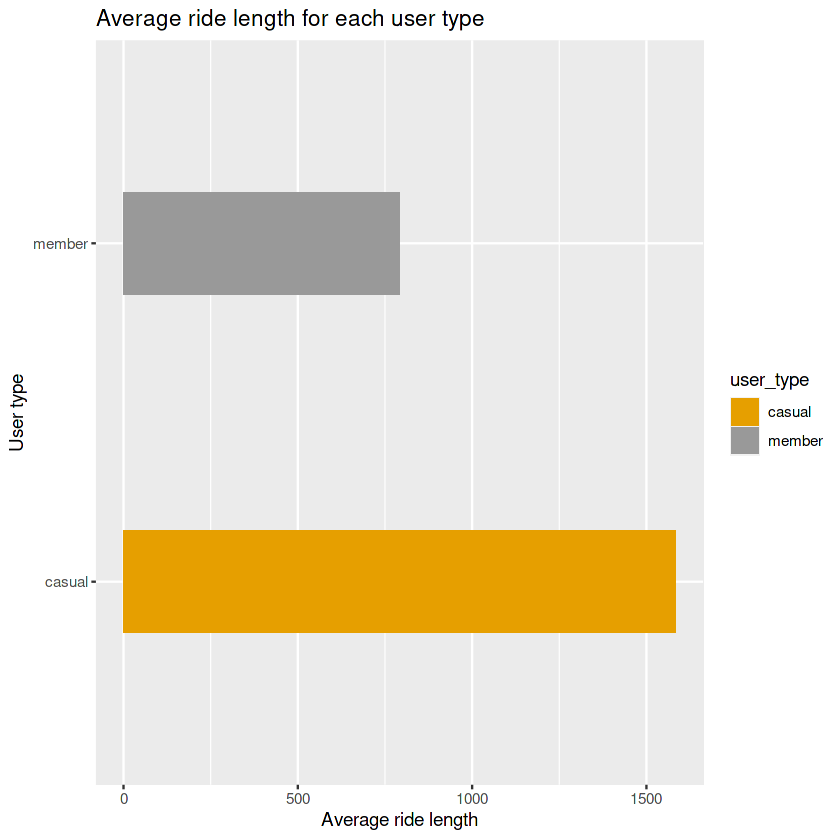

In [27]:
trips_total_v3 %>% 
  group_by(user_type) %>% 
  summarise(average_ride_length=mean(ride_length)) %>% 
  ggplot() + geom_bar(mapping = aes(x=user_type, y=average_ride_length, fill=user_type), stat='identity', width = 0.3)+ 
  labs(title = "Average ride length for each user type", x="User type", y="Average ride length") + coord_flip() + scale_fill_manual(values = c("#E69F00", "#999999"))

##### Key insights:

-   **Average `ride_length` of casual rides is 1584 secs(\~26.5 mins.) while that of member rides is 793 secs (\~13 mins**.)

-   **Average `ride_length` of casual rides is double member rides**.


#### 5.2.2  Analyzing total numbers of rides <a class="anchor" id="steps_and_minutes_asleep_per_weekday"></a>

Now we want to know the total number between the casual and member rides, and we will also verify which type of bike is most used.



In [28]:
trips_total_v3 %>% 
  group_by(user_type) %>% 
  summarise(number_of_rides = n())

user_type,number_of_rides
<chr>,<int>
casual,2517077
member,3142038


`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


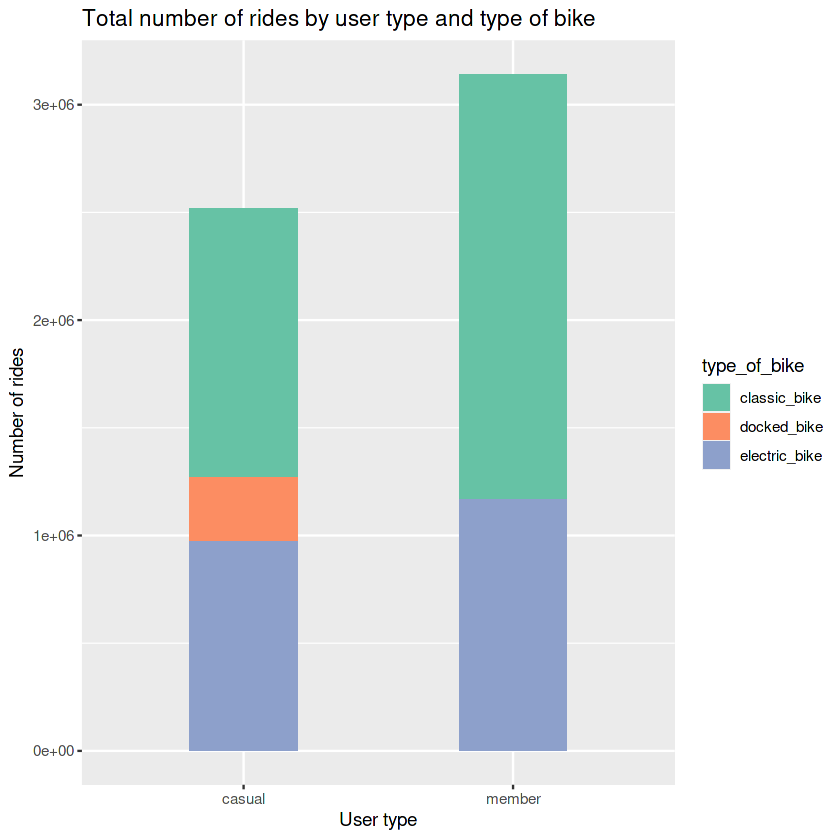

In [29]:
trips_total_v3 %>% 
  group_by(user_type, type_of_bike) %>% 
  summarise(number_of_rides = n()) %>% 
  ggplot() + geom_bar(mapping = aes(x=user_type, y=number_of_rides, fill=type_of_bike), stat='identity', width = 0.4)+
  labs(title = "Total number of rides by user type and type of bike", x="User type", y="Number of rides") + scale_fill_brewer(palette = "Set2")

##### In the graph above we can determine the following: 

-   **Overall, the total number of member rides is more than total number of casual rides**

-   **classic_bike type is the most used type of bike by both riders followed by electric bike**

-   **docked_bike is only used by casual riders**

### 5.3 Monthly ride per user  <a class="anchor" id="correlations"></a>

#### 5.3.1 Total number of monthly rides


We will now determine the total number of **monthly rides** by each user_type: 


In [30]:
trips_total_v3 <- trips_total_v3 %>%
  mutate(month =factor(month, levels = c("Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar")))
trips_total_v3 %>% 
  group_by(user_type, month) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(user_type)

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


user_type,month,number_of_rides
<chr>,<fct>,<int>
casual,Apr,135345
casual,May,250621
casual,Jun,366499
casual,Jul,437661
casual,Aug,408928
casual,Sep,360649
casual,Oct,254760
casual,Nov,105760
casual,Dec,68973


`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


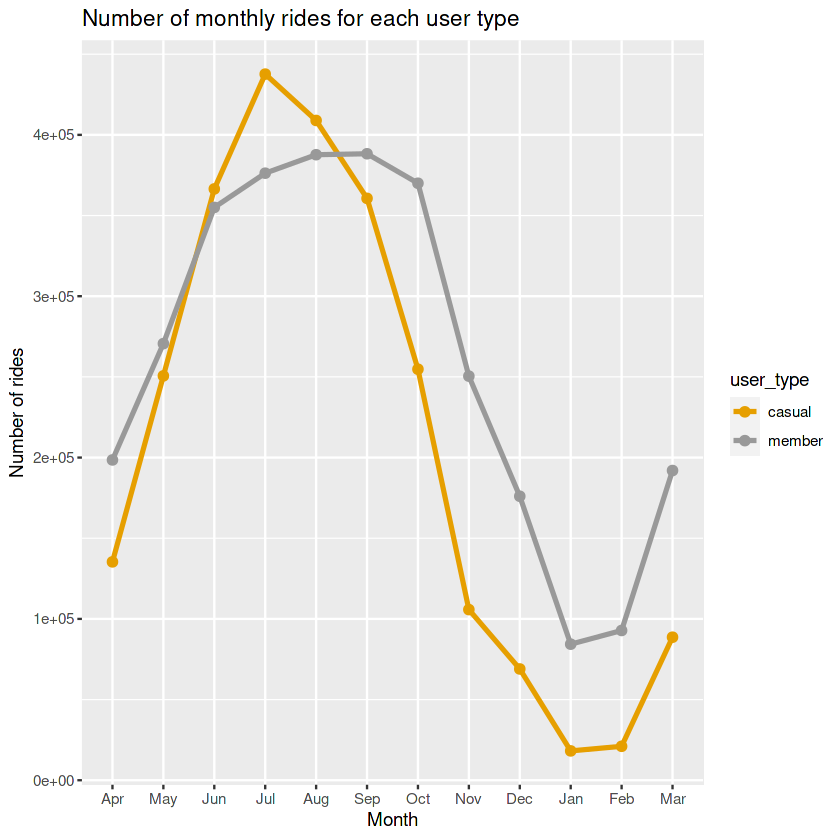

In [31]:
trips_total_v3 %>% 
  group_by(user_type, month) %>% 
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(x=month, y=number_of_rides, group=user_type, color=user_type)) + geom_line(size=1.1) + geom_point(size=2.2)+ labs(title = "Number of monthly rides for each user type", x="Month", y="Number of rides") + scale_color_manual(values = c("#E69F00", "#999999"))

### Per our line graph: 


-   **Casual trips are highest in June, July and August, surpassing the member trips in these 3 months and then considerably declining till January**

-   **Member trips are highest in July, August and September and then considerably declining till January**

-   **December, January and February have the lowest trips for both user types**






#### 5.3.2 Total number of rides by day_of_week

We will now determine the total number of **day_of_week** by each user_type: 

In [32]:
trips_total_v3 <- trips_total_v3 %>% 
  mutate(day_of_week = factor(day_of_week, levels = c("Mon","Tue","Wed","Thu","Fri","Sat","Sun")))
trips_total_v3 %>% 
  group_by(user_type, day_of_week) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(user_type)

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


user_type,day_of_week,number_of_rides
<chr>,<fct>,<int>
casual,Mon,296571
casual,Tue,307951
casual,Wed,301407
casual,Thu,296517
casual,Fri,352177
casual,Sat,522313
casual,Sun,440141
member,Mon,437293
member,Tue,501680


`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


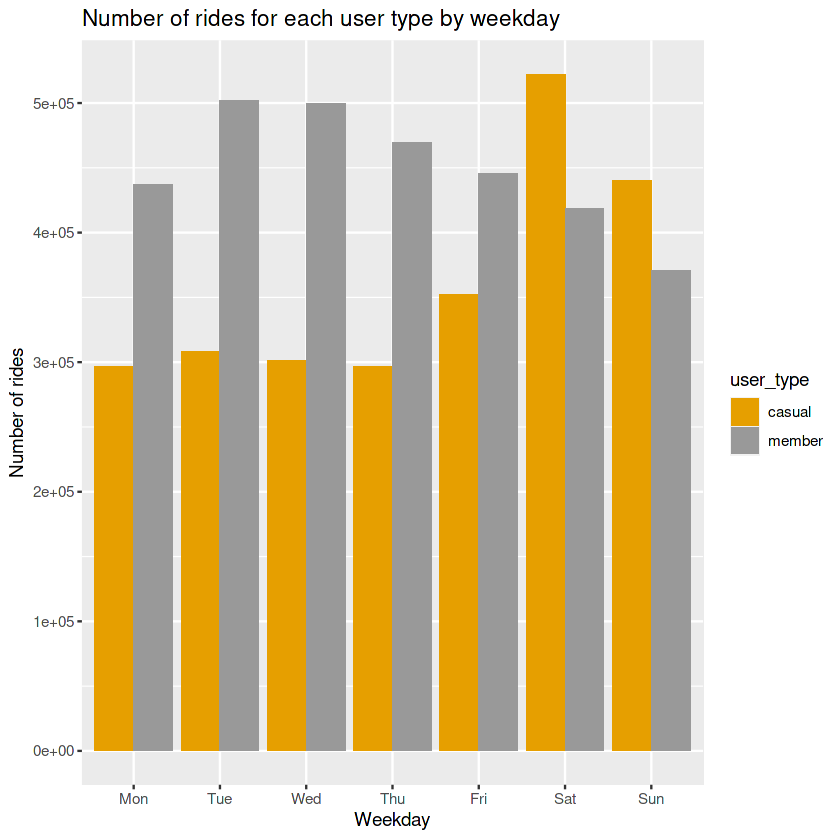

In [33]:
trips_total_v3 <- trips_total_v3 %>% 
  mutate(day_of_week = factor(day_of_week, levels = c("Mon","Tue","Wed","Thu","Fri","Sat","Sun")))
trips_total_v3 %>% 
  group_by(user_type, day_of_week) %>% 
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(x=day_of_week, y=number_of_rides, fill=user_type)) + geom_col(position = "dodge") +
  labs(title = "Number of rides for each user type by weekday", x="Weekday", y="Number of rides") + scale_fill_manual(values = c("#E69F00", "#999999"))


##### Key insights:

-   **Casual rides are highest on Weekends- Saturday and Sunday**

-   **Member rides are highest on weekdays and lowest on weekends**

-   **Casual rides are much less than member rides on weekdays and more than member rides on weekends**

#### 5.3.3 Average ride length by day_of_week



In [34]:
trips_total_v3 %>% 
  group_by(user_type, day_of_week) %>% 
  summarise(average_ride_length = mean(ride_length)) %>% 
  arrange(user_type)

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


user_type,day_of_week,average_ride_length
<chr>,<fct>,<dbl>
casual,Mon,1598.4015
casual,Tue,1523.9189
casual,Wed,1426.4720
casual,Thu,1385.5061
casual,Fri,1471.2458
casual,Sat,1715.4688
casual,Sun,1788.1248
member,Mon,769.1629
member,Tue,759.8417


`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


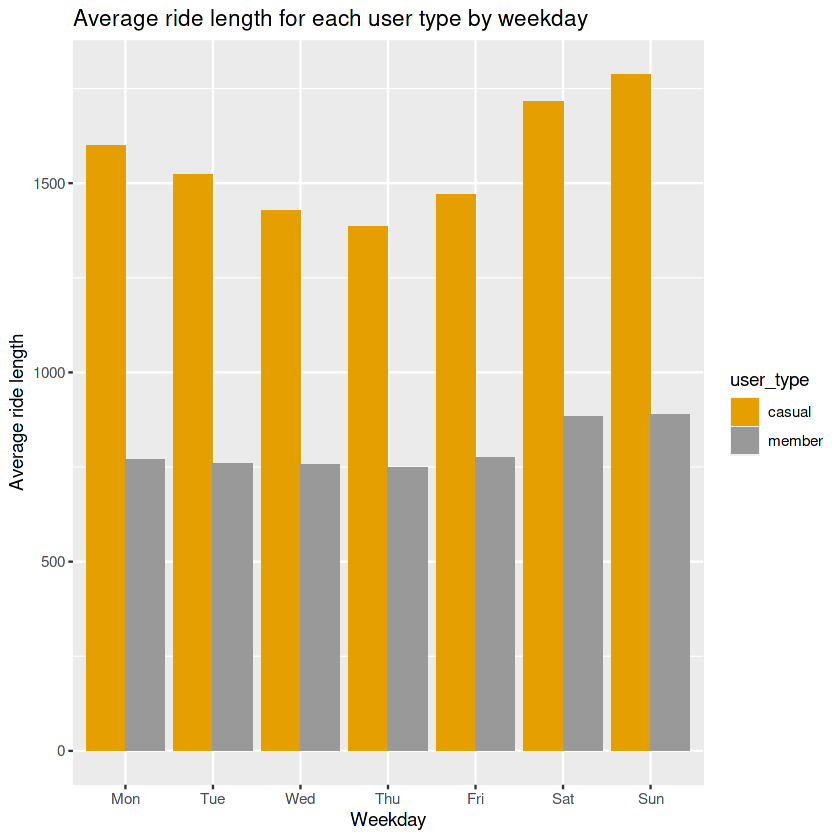

In [35]:
trips_total_v3 %>% 
  group_by(user_type, day_of_week) %>% 
  summarise(average_ride_length = mean(ride_length)) %>% 
  ggplot(aes(x=day_of_week, y=average_ride_length, fill=user_type)) + geom_col(position = "dodge") +
  labs(title = "Average ride length for each user type by weekday", x="Weekday", y="Average ride length") + scale_fill_manual(values = c("#E69F00", "#999999"))

##### Key insights:

-   **Average ride length of casual rides is highest on weekends**

-   **Average ride length of member rides remains considerably same throughout the week**

-   **Sunday has the maximum average ride length for both user types**

#### 5.4 Top 5 ride starting stations for casual user type

In [36]:
trips_total_v3 %>% 
  filter(!(is.na(start_station_name))) %>% #filtering out NA's 
  filter(user_type == "casual") %>% 
  group_by(start_station_name) %>% 
  summarise(number_of_rides =n()) %>% 
  arrange(number_of_rides) %>% 
  top_n(5) 

Selecting by number_of_rides


start_station_name,number_of_rides
<chr>,<int>
Shedd Aquarium,22989
Michigan Ave & Oak St,29397
Millennium Park,32852
Streeter Dr & Grand Ave,66732
,302558


Selecting by number_of_rides


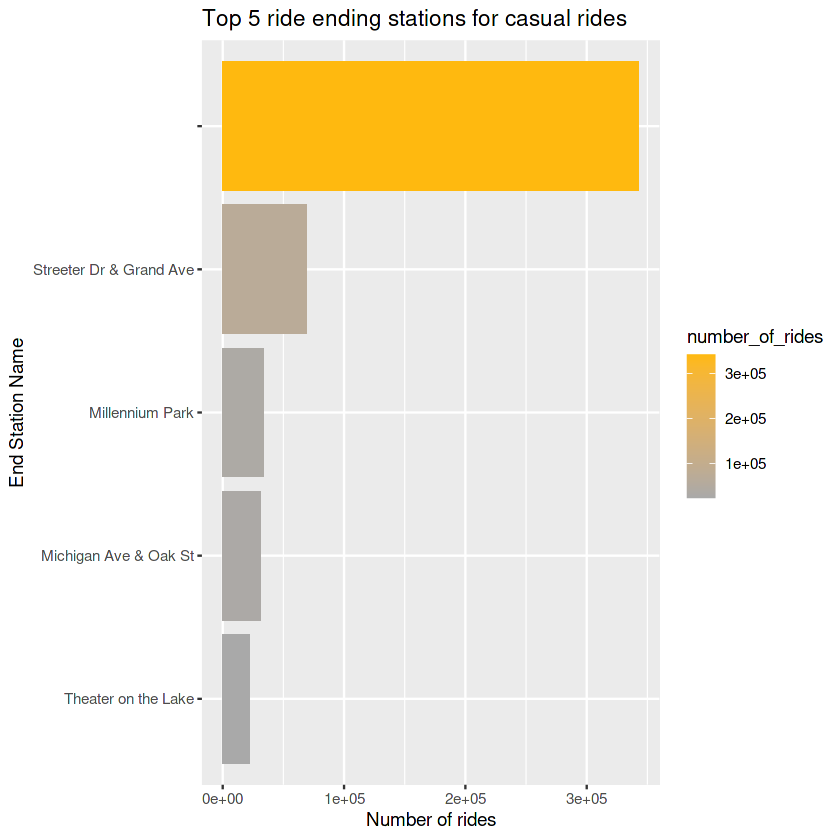

In [37]:
trips_total_v3 %>% 
  filter(!(is.na(end_station_name))) %>% 
  filter(user_type == "casual") %>% 
  group_by(end_station_name) %>% 
  summarise(number_of_rides= n()) %>% 
  arrange(- number_of_rides) %>% 
  top_n(5) %>% 
  mutate(end_station_name= fct_reorder(end_station_name, number_of_rides)) %>% 
  ggplot(mapping = aes(x=end_station_name, y=number_of_rides, fill=number_of_rides)) +
  geom_bar(stat = 'identity') + coord_flip() + 
  labs(title = "Top 5 ride ending stations for casual rides", x="End Station Name", y="Number of rides") + 
  scale_fill_gradient(low = "dark grey", high = 'darkgoldenrod1')

#### 5.4.1 Top 5 ride ending stations for casual user type

In [38]:
trips_total_v3 %>% 
  filter(!(is.na(end_station_name))) %>% #filtering out NA's 
  filter(user_type == "casual") %>% 
  group_by(end_station_name) %>% 
  summarise(number_of_rides =n()) %>% 
  arrange(-number_of_rides) %>% 
  top_n(5) 

Selecting by number_of_rides


end_station_name,number_of_rides
<chr>,<int>
,342711
Streeter Dr & Grand Ave,69178
Millennium Park,33927
Michigan Ave & Oak St,30798
Theater on the Lake,22258


Selecting by number_of_rides


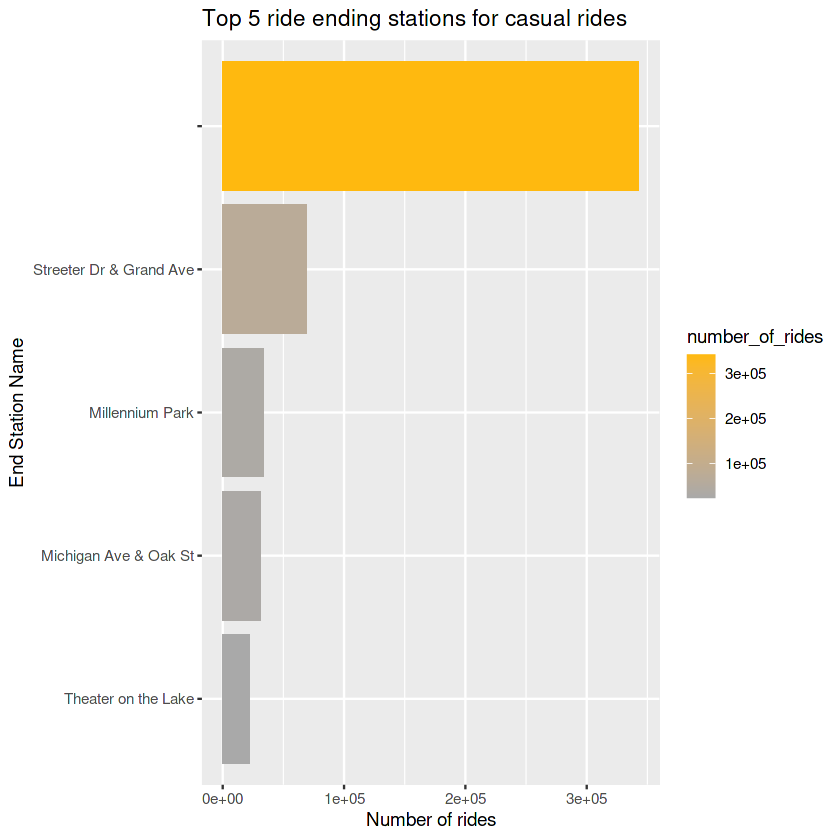

In [39]:
trips_total_v3 %>% 
  filter(!(is.na(end_station_name))) %>% 
  filter(user_type == "casual") %>% 
  group_by(end_station_name) %>% 
  summarise(number_of_rides= n()) %>% 
  arrange(-number_of_rides) %>% 
  top_n(5) %>% 
  mutate(end_station_name= fct_reorder(end_station_name, number_of_rides)) %>% 
  ggplot(mapping = aes(x=end_station_name, y=number_of_rides, fill=number_of_rides)) + geom_bar(stat = 'identity') + coord_flip() + labs(title = "Top 5 ride ending stations for casual rides", x="End Station Name", y="Number of rides") + scale_fill_gradient(low = "dark grey", high = 'darkgoldenrod1')


Analyzing our results we can see that 

-   **The top 5 ride starting stations and ride ending stations are same for casual riders.**

-   **These are the most popular places where casual rides start or end.**



#### 5.4.2 Top 5 ride starting stations for member user type <a class="anchor" id="time_used_smart_device"></a>
 

In [40]:
trips_total_v3 %>% 
  filter(!(is.na(start_station_name))) %>% #filtering out NA's 
  filter(user_type == "member") %>% 
  group_by(start_station_name) %>% 
  summarise(number_of_rides =n()) %>% 
  arrange(-number_of_rides) %>% 
  top_n(5) 

Selecting by number_of_rides


start_station_name,number_of_rides
<chr>,<int>
,348396
Kingsbury St & Kinzie St,24937
Clark St & Elm St,24633
Wells St & Concord Ln,23873
Wells St & Elm St,21087


Selecting by number_of_rides


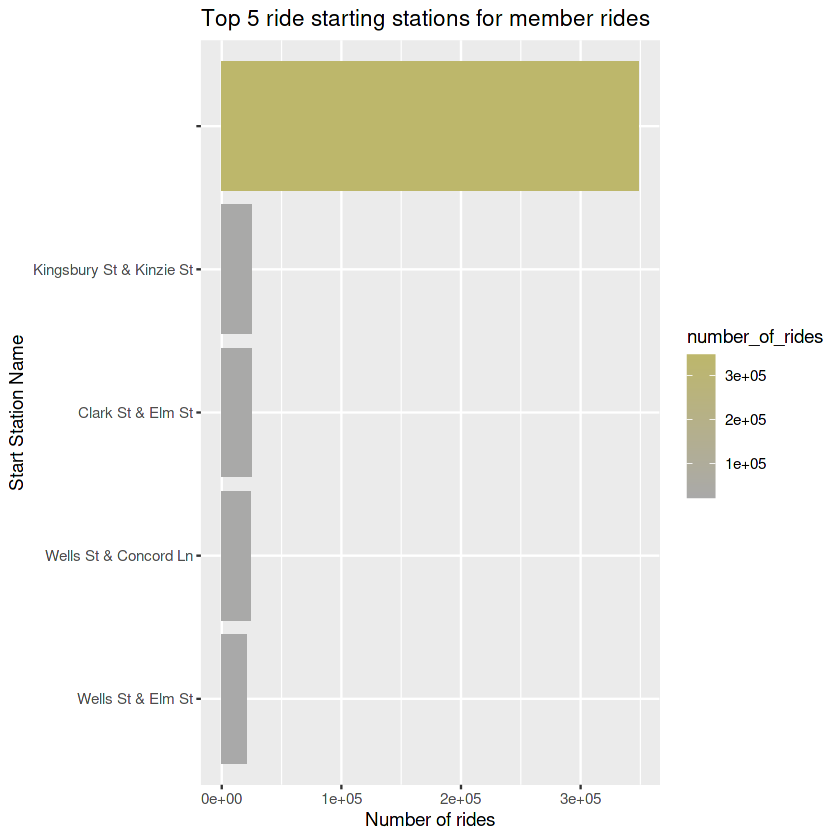

In [41]:
trips_total_v3 %>% 
  filter(!(is.na(start_station_name))) %>% 
  filter(user_type == "member") %>% 
  group_by(start_station_name) %>% 
  summarise(number_of_rides= n()) %>% 
  arrange(-number_of_rides) %>% 
  top_n(5) %>% 
  mutate(start_station_name= fct_reorder(start_station_name, number_of_rides)) %>% 
  ggplot(mapping = aes(x=start_station_name, y=number_of_rides, fill=number_of_rides)) + geom_bar(stat = 'identity') + coord_flip() + labs(title = "Top 5 ride starting stations for member rides", x="Start Station Name", y="Number of rides") + scale_fill_gradient(low = "dark grey", high = 'darkkhaki')


#### 5.4.3 Top 5 ride ending stations for member user type

In [42]:
trips_total_v3 %>% 
  filter(!(is.na(end_station_name))) %>% #filtering out NA's 
  filter(user_type == "member") %>% 
  group_by(end_station_name) %>% 
  summarise(number_of_rides =n()) %>% 
  arrange(-number_of_rides) %>% 
  top_n(5) 

Selecting by number_of_rides


end_station_name,number_of_rides
<chr>,<int>
,344514
Kingsbury St & Kinzie St,24846
Clark St & Elm St,24718
Wells St & Concord Ln,24519
Wells St & Elm St,21719


Selecting by number_of_rides


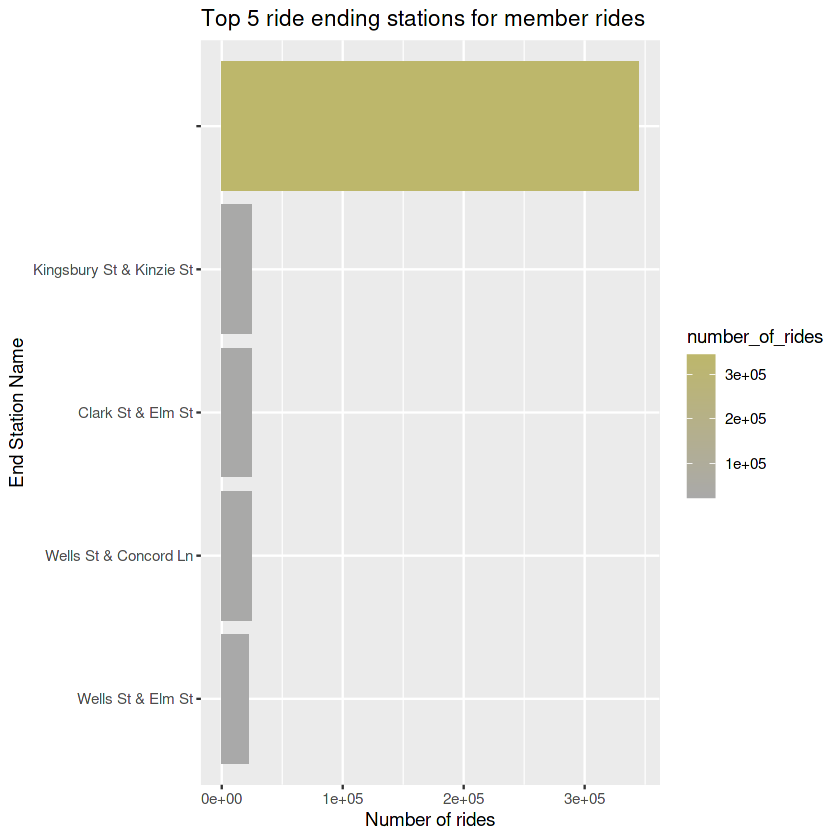

In [43]:
trips_total_v3 %>% 
  filter(!(is.na(end_station_name))) %>% 
  filter(user_type == "member") %>% 
  group_by(end_station_name) %>% 
  summarise(number_of_rides= n()) %>% 
  arrange(-number_of_rides) %>% 
  top_n(5) %>% 
  mutate(end_station_name= fct_reorder(end_station_name, number_of_rides)) %>% 
  ggplot(mapping = aes(x=end_station_name, y=number_of_rides, fill=number_of_rides)) + geom_bar(stat = 'identity') + coord_flip() + labs(title = "Top 5 ride ending stations for member rides", x="End Station Name", y="Number of rides") + scale_fill_gradient(low = "dark grey", high = 'darkkhaki')



##### Key insights:

-   **The top 5 ride starting stations and ride ending stations are same for member riders as well.**

-   **The volume of casual rides from its top docking station is significantly more than volume of member rides from its top docking station**



#### 5.4.4 Export Summary file for further analysis 

We will create a csv file that we will visualize in Tableau



In [ ]:
write.csv(trips_total_v3, file = "trips_total_v3.csv")

#### 5.5 Share Phase

The data highlights the main differences between casuals and members. The main story that the data is telling would be both casuals and members belong to different demographics. The various differences highlighted by the data suggests that both members and casuals use bikes for different purposes. 

Members incorporate bike usage as part of their daily lives, utilising them for everyday activities such as going to work. This is supported by the findings such as members taking up greater proportions of rides for most of the day, significant increases in rides at certain times (such as 5am - 6am) and stable ride lengths throughout the week.The data suggests a fixed routine usage of bikes by members throughout the week.  

On the other hand, casuals would more likely be using bikes for recreational purposes.This is evident from findings such as the huge influx of casuals on weekends, significantly higher ride lengths on weekends than on weekdays, and higher proportions of casuals during odd hours of the day. 

By expounding on these behavioural differences from the data, we could build separate profiles for the target groups to tackle the business problem. The main findings from the data can then be visualised and presented in an accessible way to the Cyclistic marketing analytics team, Lily Moreno and Cyclistic executive team. 

# <span style="color:#2B547E"> 6. Conclusion (Act Phase) </span> <a class="anchor" id="conclusion_act_phase"></a>

This step involves stating conclusions from the analysis and giving recommendations to answer the business question based on the insights generated.

### 6.1 Conclusions from the analysis

1. The average ride length for casual rides is **30 minutes** which is more than double of that of member rides - **13 minutes**

2.  * No. of **casual rides** are highest in **June, July and August** with its **peak in July** and lowest in December, January and February
    * No. of **member rides** are highest in **July, August and September** with its **peak in September** and lowest in December, January and February
    
    

3.  * Casual rides are highest on **weekends- Saturday and Sunday** with the highest **average ride lengths**
    * Member rides are lowest on weekends
    
    
   
4. Both casual and member rides **peak in the afternoon time** ie. 12PM to 5PM



5. The top 5 ride starting and ending stations for casual users are- **Streeter Dr & Grand Ave, Millennium Park, Michigan Ave & Oak St, Shedd Aquarium and Theater on the Lake**


|Recommendation| Description |
|---| ---|
|1. promotion with subscription offers| To attract the maximum number of Casual riders, promotion with subscription offers shall be done during the months of June, July and August.|
|2. Subscription booth| shall be set up on the top 5 docking stations for Casual riders during afternoon time ie. 12PM-5PM on weekends to give away “Weekend discounts” to membership subscriptions, leveraging the heavy weekend traffic.|
|3. Encourage usage of bikes for recreational | activities not just solely on weekends, but on weekdays as well to encourage greater usage of bikes by casuals.|
|4. Provide incentives for existing members  | to encourage casuals to convert to memberships such as referral codes.|
|5. Capitalise on the popular stations |  frequented by casuals and incorporate them into the marketing strategy to        further increase exposure.|




## Conclusion

The case study helped me in understanding and carrying out the complete Data Analysis Process from start to end, for a real-world scenario. It led me in exploring a whole new set of R functions for effective Data Analysis.

For the next steps of the analysis, socio-economic and geographic data of Casual riders and Annual members could be used to compare the user types and generate insights for the marketing strategy aiming to convert Casual riders into Annual Members.
